In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('grayscale')

[2.48642477 0.47974134]


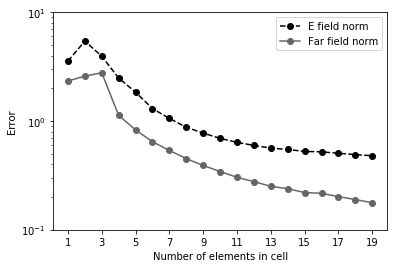

In [4]:
with open("results1.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in reader])

plt.plot(results[:, 0], results[:, 1], "o--", label="E field norm")
plt.plot(results[:, 0], results[:, 2], "o-", label="Far field norm")
plt.yscale("log")
plt.xlabel("Number of elements in cell")
plt.ylabel("Error")
plt.ylim([0.1, 10])
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.legend()
#plt.show()
plt.savefig("compare.pdf", bbox_inches="tight")

print (results[[3, 18], 1])

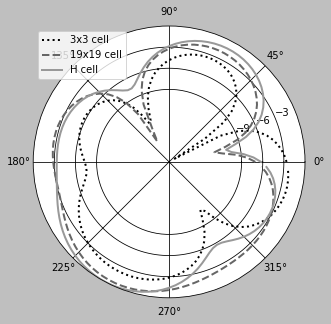

In [28]:
phi = np.linspace(0, 2 * np.pi, num = 120, endpoint = False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

label = ("3x3 cell", "19x19 cell", "H cell")
files = ("ff_isotropic-3.npy", "ff_isotropic-19.npy", "ff_anisotropic-5.npy")
dashes_type = (":", "--", "-")
ff = []
for file in files:
    with open(file, "rb") as f:
        ff.append(np.load(f))
ff = np.array(ff)
ff_max = np.abs(np.max(np.log10(ff)))
ff = 10 * (np.log10(ff) + ff_max)

for i in range(3):
    ax.plot(phi, ff[i], dashes_type[i], label=label[i], linewidth=2)
ax.set_rticks([-9, -6, -3])
plt.legend()
#plt.show()
plt.savefig("farfield.pdf", bbox_inches="tight")

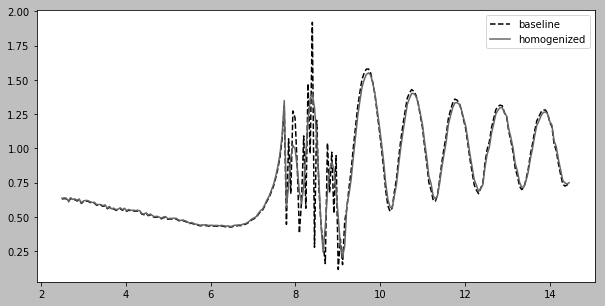

In [29]:
with open("plot_over_line.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    #skip header
    next(reader, None)
    results = np.array([[float(i) for i in row] for row in reader])
results = results[::3]
isotropic = results[:, 2] + results[:, 1]*1j
anisotropic = results[:, 4] + results[:, 3]*1j

plt.plot(results[:, 0], np.abs(isotropic), "--", label="baseline")
plt.plot(results[:, 0], np.abs(anisotropic), "-", label="homogenized")
plt.legend()
plt.savefig("line.pdf", bbox_inches="tight")

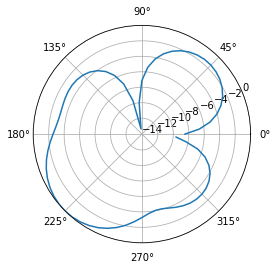

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
with open("isotropic_test.npy", "rb") as f:
    phi, ff = np.load(f)
ff_max = abs(max(np.log10(ff)))
ff = 10 * (np.log10(ff) + ff_max)
ax.plot(phi, ff)
plt.show()